<img src = "https://drive.google.com/uc?export=view&id=1vU_Lg5LD6Dn521znF_9E6OsJgwptOT9E" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento de los Datos**
---

Este notebook es una plantilla que le puede servir como guía para el segundo entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. **Gabriel Santiago Delgado Lozano C.C. 1000697520**
2. **Angel David Piñeros Sierra C.C. 1000381674**
3. **María Alejandra Rodríguez Ríos. C.C. 1000592008**

## **0. Importanción de librerías**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Carga de datos**
---
Proporcione únicamente el código de Python necesario para descargar el conjunto de datos que será utilizado en el proyecto. Si es necesario, realice operaciones de adquisición e integración del conjunto de datos.

In [2]:
url = "https://raw.githubusercontent.com/gdelgadol/MLDS-Modulo1-Proyecto/refs/heads/main/Spotify_Youtube.csv"
data_musica = pd.read_csv(url)
data_musica.head()

#Eliminamos la columna "unnamed" porque solo son IDs de las filas
data_musica.drop(columns=["Unnamed: 0"], inplace=True)
data_musica.head()

Artist                                        Url_spotify  \
0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                  Plastic Beach      album   
4                                       Gorillaz      album   

                                    Uri  Danceability  Energy   Key  Loudness  \
0  spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0    -6.679   
1  spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0    -5.815   
2  spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0    -3.930   
3  spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0    -5.810   
4  spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0    -8.627   

   ...                                  Url_youtube  \
0  ...  https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1  ...  https://www.youtube.com/watch?v=yYDmaexVHic   
2  ...  https://www.youtube.com/watch?v=qJa-VFwPpYA   
3  ...  https://www.youtube.com/watch?v=04mfKJWDSzI   
4  ...  https://www.youtube.com/watch?v=1V_xRb0x9aw   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   
3     Gorillaz - On Melancholy Hill (Official Video)  Gorillaz  211754952.0   
4         Gorillaz - Clint Eastwood (Official Video)  Gorillaz  618480958.0   

       Likes  Comments                                        Description  \
0  6220896.0  169907.0  Official HD Video for Gorillaz' fantastic trac...   
1  1079128.0   31003.0  The official video for Gorillaz - Rhinestone E...   
2   282142.0    7399.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3  1788577.0   55229.0  Follow Gorillaz online:\nhttp://gorillaz.com \...   
4  6197318.0  155930.0  The official music video for Gorillaz - Clint ...   

  Licensed official_video        Stream  
0     True           True  1.040235e+09  
1     True           True  3.100837e+08  
2     True           True  6.306347e+07  
3     True           True  4.346636e+08  
4     True           True  6.172597e+08  

[5 rows x 27 columns]

In [3]:
missing_official = (data_musica['official_video'] == '').sum()
print(f'Registros sin etiqueta official_video: {missing_official}')
data_musica.loc[data_musica['official_video'] == '', 'official_video'] = 'False'
data_musica['official_video'] = data_musica['official_video'].map({'True': True, 'False': False})
print(data_musica['official_video'].value_counts())

Registros sin etiqueta official_video: 0
Series([], Name: count, dtype: int64)


## **2. Análisis Exploratorio de los Datos**
---

Normalmente en el análisis exploratorio, se trata de dar respuesta a los siguientes elementos:

### **2.1. Resumen General**
---
Utilizando la función `info()`, se puede obtener información del conjunto de datos. Se cuenta con un total de 20,718 registros, cada uno con 28 columnas de variables. Los datos están compuestos por una variable entera de 64-bits, variables categóricas objetos de tipo `string`, y las variables técnicas son flotantes de 64-bits. El tamaño del archivo CSV es de 30.78 MB y consume más de 4.4 MB de memoria en el Notebook.

In [4]:
data_musica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

### **2.2. Análisis estadístico descriptivo**
---

Describa el conjunto de datos por medio de estadística descriptiva, aportando interpretaciones precisas que ayuden a entender los datos.

Llamando la función de `describe`, podemos ver un resumen de las estadísticas de las variables cuantitativas.

In [5]:
data_musica.describe()

Danceability        Energy           Key      Loudness   Speechiness  \
count  20716.000000  20716.000000  20716.000000  20716.000000  20716.000000   
mean       0.619777      0.635250      5.300348     -7.671680      0.096456   
std        0.165272      0.214147      3.576449      4.632749      0.111960   
min        0.000000      0.000020      0.000000    -46.251000      0.000000   
25%        0.518000      0.507000      2.000000     -8.858000      0.035700   
50%        0.637000      0.666000      5.000000     -6.536000      0.050500   
75%        0.740250      0.798000      8.000000     -4.931000      0.103000   
max        0.975000      1.000000     11.000000      0.920000      0.964000   

       Acousticness  Instrumentalness      Liveness       Valence  \
count  20716.000000      20716.000000  20716.000000  20716.000000   
mean       0.291535          0.055962      0.193521      0.529853   
std        0.286299          0.193262      0.168531      0.245441   
min        0.000001          0.000000      0.014500      0.000000   
25%        0.045200          0.000000      0.094100      0.339000   
50%        0.193000          0.000002      0.125000      0.537000   
75%        0.477250          0.000463      0.237000      0.726250   
max        0.996000          1.000000      1.000000      0.993000   

              Tempo   Duration_ms         Views         Likes      Comments  \
count  20716.000000  2.071600e+04  2.024800e+04  2.017700e+04  2.014900e+04   
mean     120.638340  2.247176e+05  9.393782e+07  6.633411e+05  2.751899e+04   
std       29.579018  1.247905e+05  2.746443e+08  1.789324e+06  1.932347e+05   
min        0.000000  3.098500e+04  0.000000e+00  0.000000e+00  0.000000e+00   
25%       97.002000  1.800095e+05  1.826002e+06  2.158100e+04  5.090000e+02   
50%      119.965000  2.132845e+05  1.450110e+07  1.244810e+05  3.277000e+03   
75%      139.935000  2.524430e+05  7.039975e+07  5.221480e+05  1.436000e+04   
max      243.372000  4.676058e+06  8.079649e+09  5.078865e+07  1.608314e+07   

             Stream  
count  2.014200e+04  
mean   1.359422e+08  
std    2.441321e+08  
min    6.574000e+03  
25%    1.767486e+07  
50%    4.968298e+07  
75%    1.383581e+08  
max    3.386520e+09

Para hacer un análisis descriptivo de cada variable, se va a crear una función generalizada para sacar las medidas estadísticas claves de dicha variable.

In [6]:
def analisis_estadistico_variable(df, variable):
    if variable not in df.columns:
        raise ValueError(f"La columna '{variable}' no existe.")

    data = df[variable].dropna()

    if not np.issubdtype(data.dtype, np.number):
        raise TypeError(f"La columna '{variable}' no es numérica.")

    print(f"\nVariable: {variable}")
    print(f"Media: {data.mean():.4f}")
    print(f"Mediana: {data.median():.4f}")
    print(f"Moda: {data.mode().iloc[0]:.4f}")
    print(f"Desviación estándar: {data.std():.4f}")
    print(f"Valor mínimo: {data.min():.4f}")
    print(f"Valor máximo: {data.max():.4f}")
    print(f"Rango: {data.max() - data.min():.4f}")

    # Histograma + KDE
    plt.figure()
    sns.histplot(data, kde=True)
    plt.title(f"Distribución de {variable}")
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.show()

    # Boxplot
    plt.figure()
    sns.boxplot(x=data)
    plt.title(f"Boxplot de {variable}")
    plt.show()



Variable: Danceability
Media: 0.6198
Mediana: 0.6370
Moda: 0.6870
Desviación estándar: 0.1653
Valor mínimo: 0.0000
Valor máximo: 0.9750
Rango: 0.9750


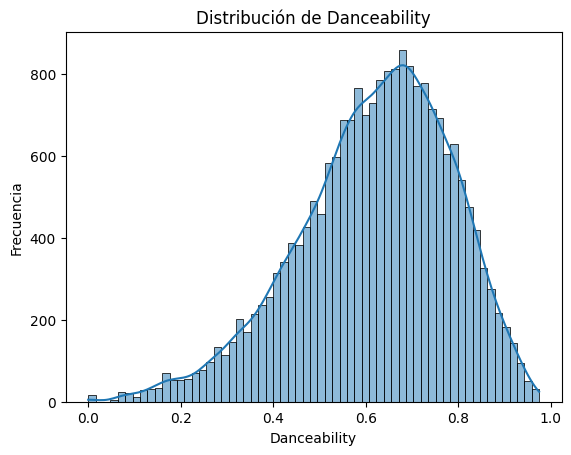

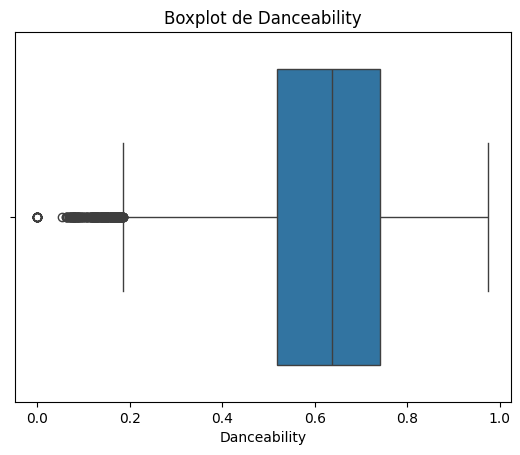

In [7]:
analisis_estadistico_variable(data_musica, "Danceability")

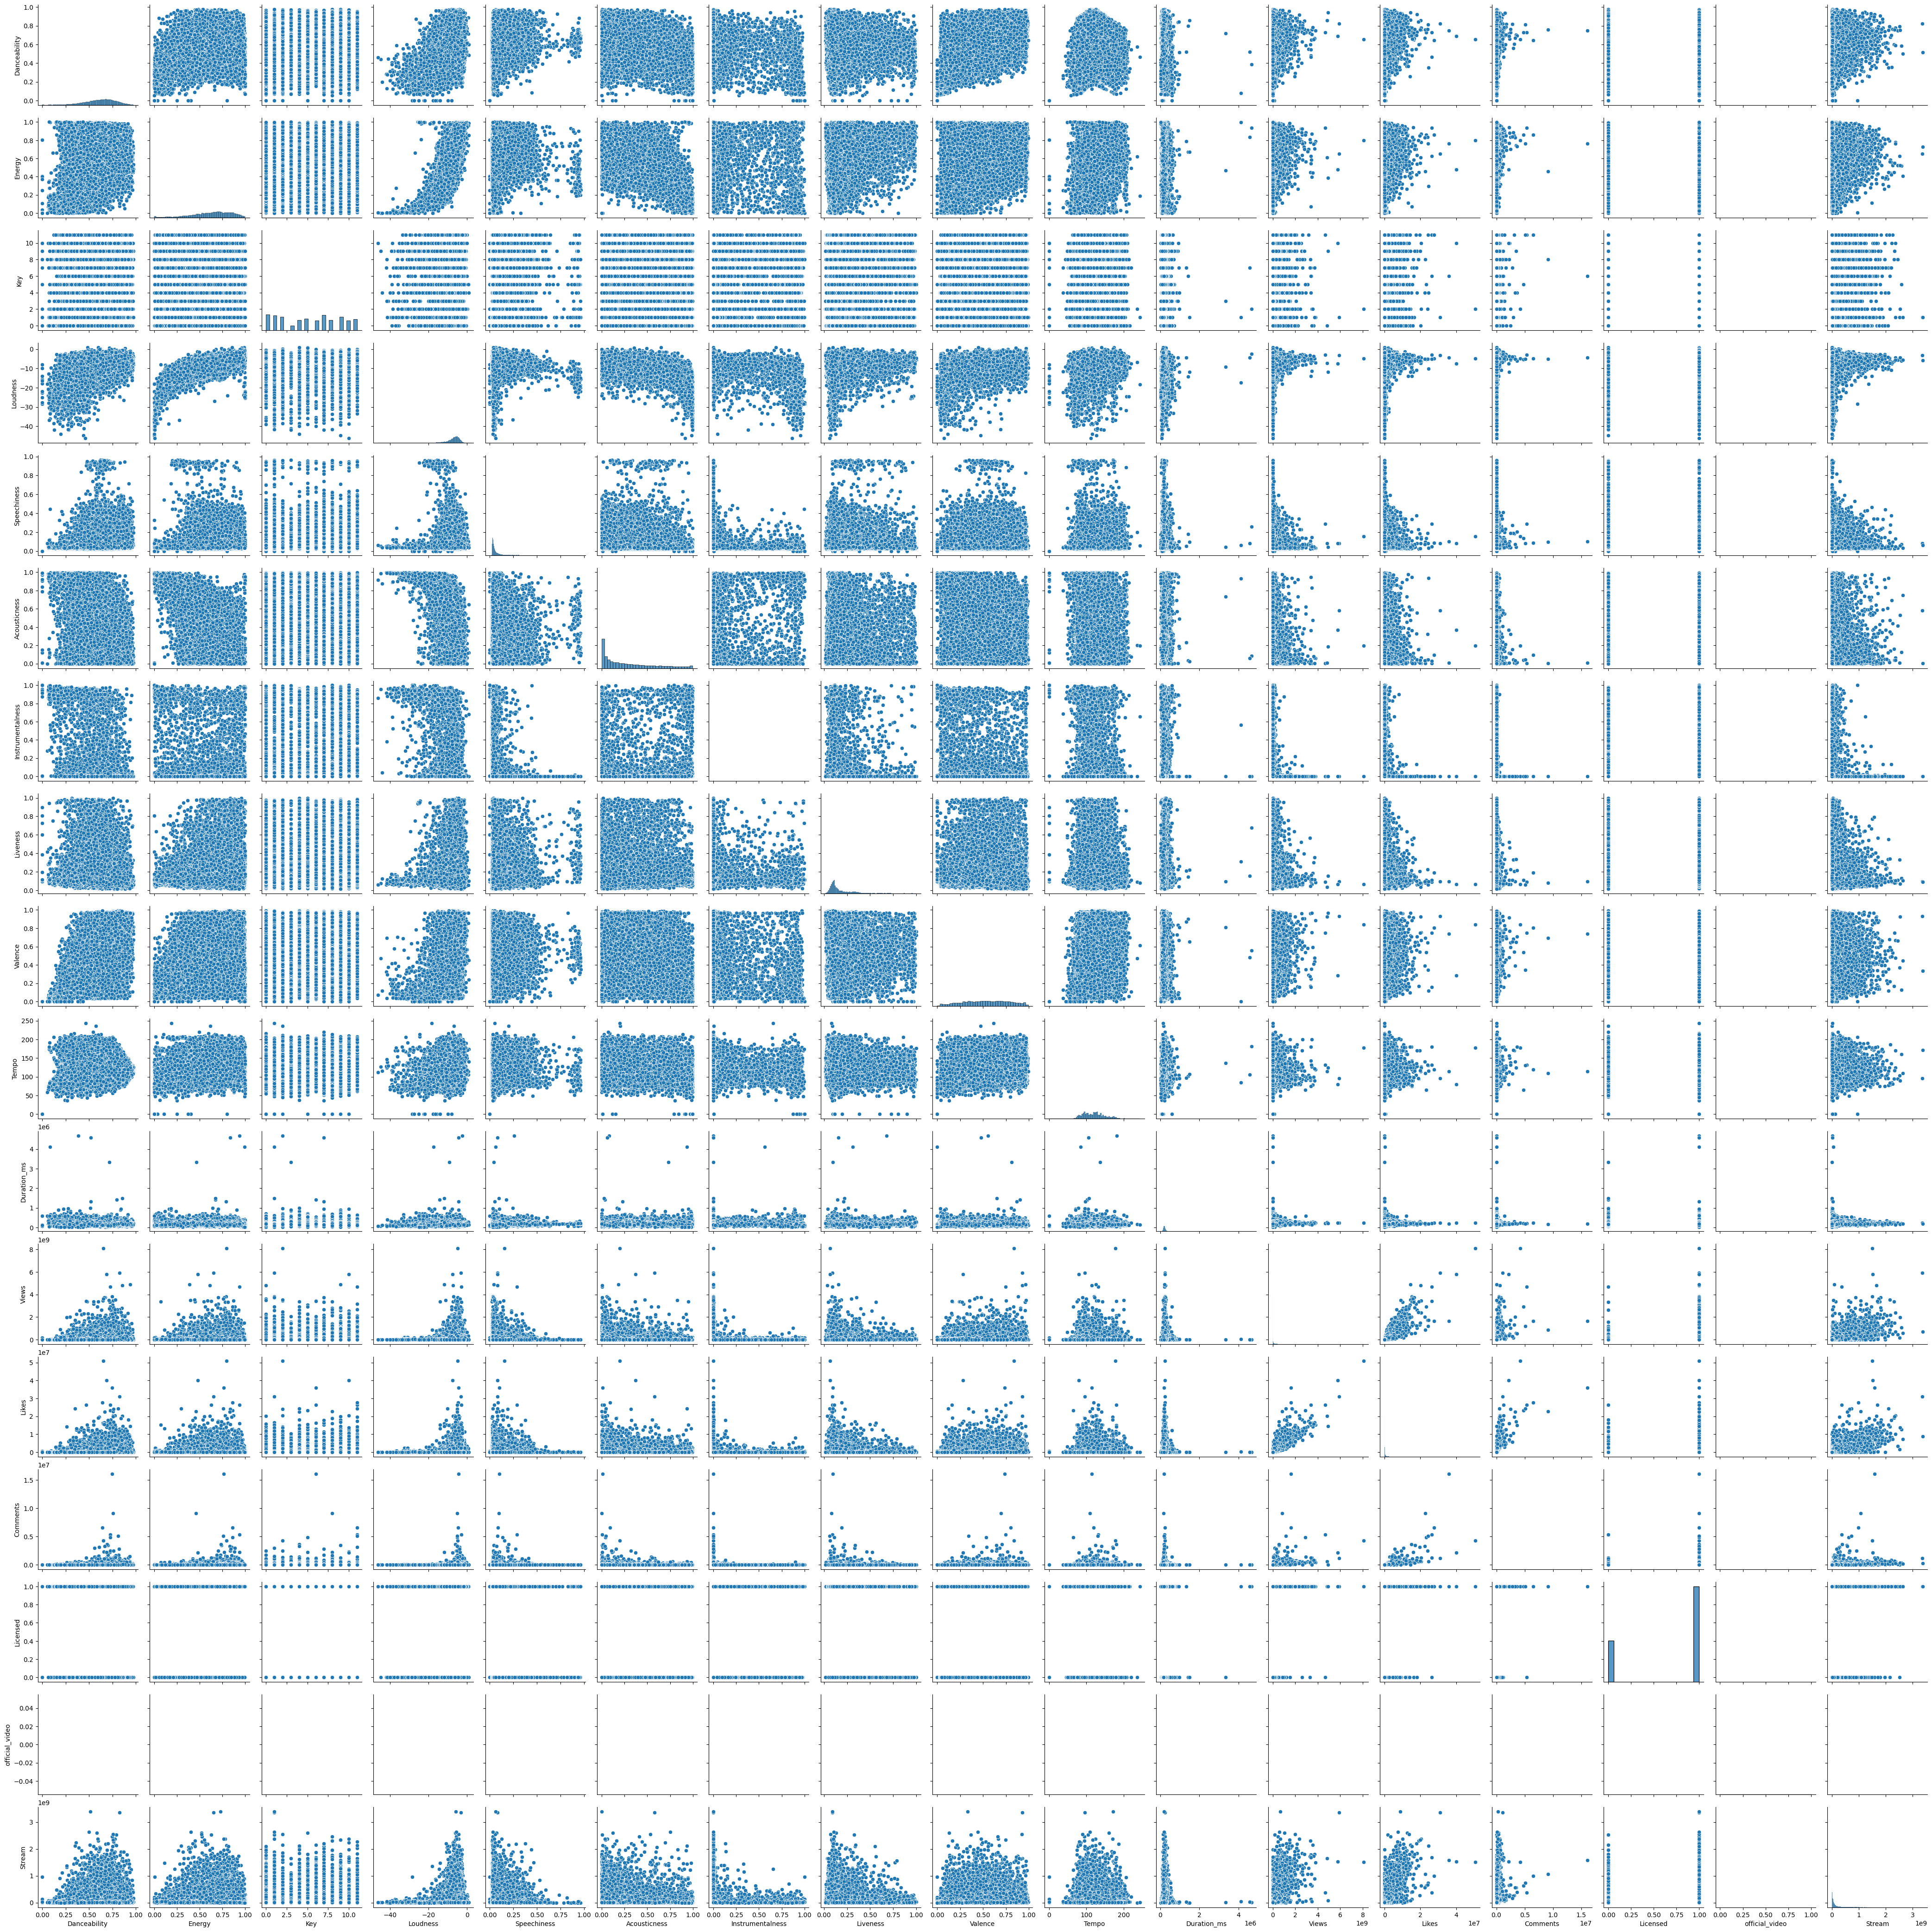

In [8]:
sns.pairplot(data_musica)

### **2.3. Resumen de la Calidad de los datos**
---

- ¿Se detecta la ausencia de datos, la presencia de datos erróneos o la existencia de datos de baja calidad en el conjunto?
- ¿Se identifican registros con datos ilegibles o con dificultades de codificación durante la revisión del conjunto de datos?
- ¿Se observa una diversidad de formatos en el conjunto de datos que pueda dificultar su consistencia o comprensión?
- ¿Se identificaron y abordaron posibles problemas, como valores atípicos, duplicados o datos faltantes?

In [9]:
# ---INGRESE SU CÓDIGO---

---**INGRESE SU RESPUESTA**---

### **2.4. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.

In [12]:
numeric_cols = data_musica.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data_musica.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

resumen_tipos = (
    pd.DataFrame({'columna': data_musica.columns, 'dtype': data_musica.dtypes.astype(str)})
    .assign(tipo_variable=lambda df: df['dtype'].apply(lambda x: 'Numérica' if x in ['int64', 'float64'] else 'Categórica'))
)
display(resumen_tipos)

print(f"Variables numéricas ({len(numeric_cols)}):")
print(numeric_cols)
print("\nVariables categóricas ({}):".format(len(categorical_cols)))
print(categorical_cols)


columna    dtype tipo_variable
Artist                      Artist   object    Categórica
Url_spotify            Url_spotify   object    Categórica
Track                        Track   object    Categórica
Album                        Album   object    Categórica
Album_type              Album_type   object    Categórica
Uri                            Uri   object    Categórica
Danceability          Danceability  float64      Numérica
Energy                      Energy  float64      Numérica
Key                            Key  float64      Numérica
Loudness                  Loudness  float64      Numérica
Speechiness            Speechiness  float64      Numérica
Acousticness          Acousticness  float64      Numérica
Instrumentalness  Instrumentalness  float64      Numérica
Liveness                  Liveness  float64      Numérica
Valence                    Valence  float64      Numérica
Tempo                        Tempo  float64      Numérica
Duration_ms            Duration_ms  float64      Numérica
Url_youtube            Url_youtube   object    Categórica
Title                        Title   object    Categórica
Channel                    Channel   object    Categórica
Views                        Views  float64      Numérica
Likes                        Likes  float64      Numérica
Comments                  Comments  float64      Numérica
Description            Description   object    Categórica
Licensed                  Licensed   object    Categórica
official_video      official_video   object    Categórica
Stream                      Stream  float64      Numérica

Variables numéricas (15):
['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']

Variables categóricas (12):
['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri', 'Url_youtube', 'Title', 'Channel', 'Description', 'Licensed', 'official_video']


**Respuesta 2.4.** El dataset aún no tiene una variable objetivo definida; para avanzar será necesario escogerla en concordancia con el problema que se desee resolver. Mientras tanto, la tabla generada en la celda anterior resume cada columna con su `dtype` y la clasifica en numérica o categórica, lo cual sirve como inventario de variables y guía las transformaciones requeridas en futuros análisis (normalización para métricas continuas, codificación para campos categóricos, etc.).

### **2.5. Distribución de visualizaciones (YouTube vs. Spotify)**
---
Visualizar la dispersión de las métricas `Views` (YouTube) y `Stream` (reproducciones en Spotify) permite identificar qué tan concentrado está el consumo del catálogo y si existen valores extremos que convenga tratar antes del modelado.

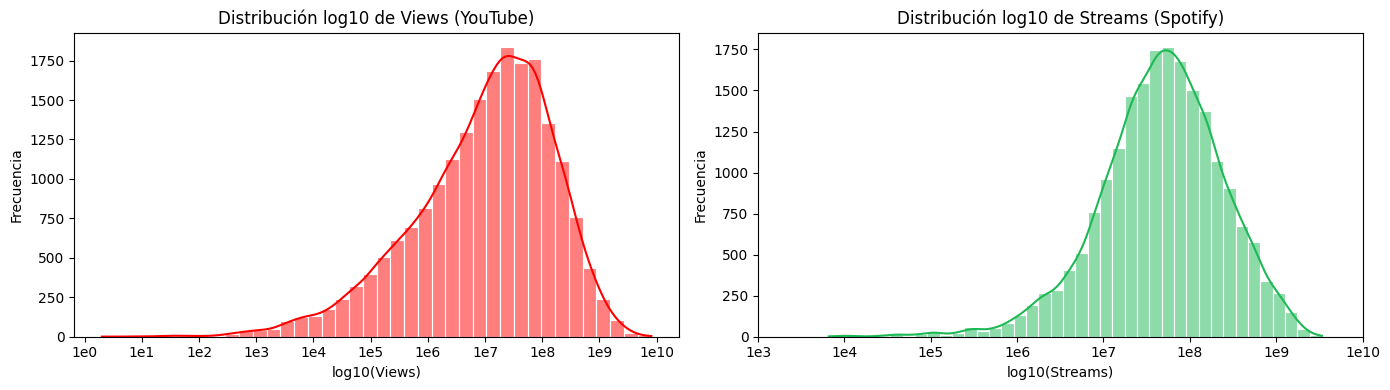

count          mean           std     min      median           max
Views   20248.0  9.393782e+07  2.746443e+08     0.0  14501095.0  8.079649e+09
Stream  20142.0  1.359422e+08  2.441321e+08  6574.0  49682981.5  3.386520e+09

In [15]:
# Nos quedamos solo con valores válidos (no nulos) para cada plataforma
views = data_musica['Views'].dropna()
streams = data_musica['Stream'].dropna()
# Transformación log10 para reducir el sesgo provocado por los outliers
views_log = np.log10(views[views > 0])
streams_log = np.log10(streams[streams > 0])

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=False)
# Histograma + KDE de YouTube usando el rojo característico de la plataforma
sns.histplot(views_log, bins=40, ax=axes[0], color='#FF0000', edgecolor='white', kde=True)
axes[0].set_title('Distribución log10 de Views (YouTube)')
axes[0].set_xlabel('log10(Views)')
axes[0].set_ylabel('Frecuencia')
# Histograma + KDE de Spotify en verde institucional
sns.histplot(streams_log, bins=40, ax=axes[1], color='#1DB954', edgecolor='white', kde=True)
axes[1].set_title('Distribución log10 de Streams (Spotify)')
axes[1].set_xlabel('log10(Streams)')
axes[1].set_ylabel('Frecuencia')

def sci_ticks(values):
    """Genera ticks enteros y los etiqueta como potencias de 10 para mayor legibilidad"""
    ticks = np.arange(np.floor(values.min()), np.ceil(values.max()) + 1)
    return ticks

for ax, data_log in zip(axes, [views_log, streams_log]):
    ticks = sci_ticks(data_log)
    ax.set_xticks(ticks)
    ax.set_xticklabels([f'1e{int(t)}' for t in ticks])

plt.tight_layout()
plt.show()

# Cuadro estadístico para contrastar los cuantiles de ambas métricas
resumen_views_stream = data_musica[['Views', 'Stream']].describe().T[['count', 'mean', 'std', 'min', '50%', 'max']]
resumen_views_stream.rename(columns={'50%': 'median'}, inplace=True)
display(resumen_views_stream)


**Observaciones.** Al graficar las métricas en escala logarítmica (log10) se aprecia mejor la concentración de reproducciones entre 1e4 y 1e7, mientras que los éxitos virales (por encima de 1e8) se convierten en una cola corta y manejable. Aun así, las estadísticas descriptivas muestran máximos superiores a 1.0×10⁹, por lo que conviene considerar transformaciones logarítmicas o técnicas de winsorización al entrenar modelos que usen `Views` o `Stream`.

## **Créditos**
* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*